In [3]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt
import cmath 
import random
import os

LECTURE ET AFFICHAGE DE L'IMAGE 

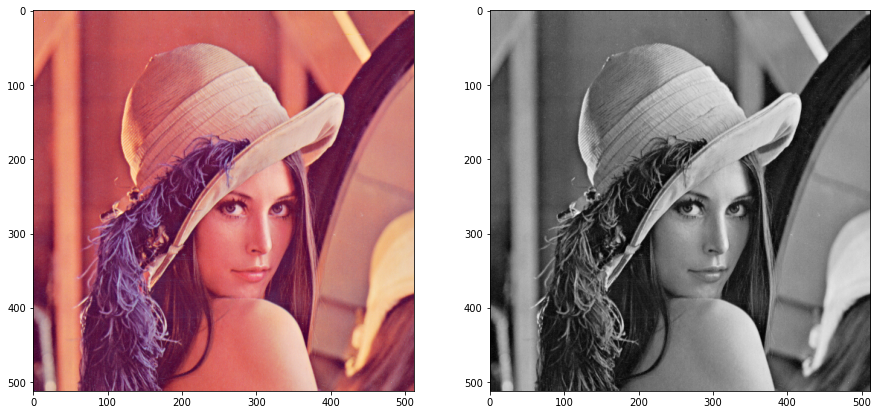

In [4]:
fig = plt.figure(figsize=(15,15))
lena = cv.imread('lena.png')
lena = cv.cvtColor(lena, cv.COLOR_BGR2RGB)
fig.add_subplot(1,2,1)
plt.imshow(lena)
R,G,B=cv.split(lena)
lena_gris= 0.2126*R+0.7152*G+0.0722*B
fig.add_subplot(1,2,2)
plt.imshow(lena_gris,cmap='gray')

**LA PHASE** :  represente la direction du gradients 

1-Classique:

C:\Users\benz\AppData\Local\Temp\ipykernel_9828\4109918888.py:18: RuntimeWarning: divide by zero encountered in true_divide
  phase=np.arctan(filtrever/filtrehor)
C:\Users\benz\AppData\Local\Temp\ipykernel_9828\4109918888.py:18: RuntimeWarning: invalid value encountered in true_divide
  phase=np.arctan(filtrever/filtrehor)
C:\Users\benz\AppData\Local\Temp\ipykernel_9828\4109918888.py:46: RuntimeWarning: divide by zero encountered in true_divide
  phase_sobel=np.arctan(sobely/sobelx)
C:\Users\benz\AppData\Local\Temp\ipykernel_9828\4109918888.py:46: RuntimeWarning: invalid value encountered in true_divide
  phase_sobel=np.arctan(sobely/sobelx)
C:\Users\benz\AppData\Local\Temp\ipykernel_9828\4109918888.py:81: RuntimeWarning: divide by zero encountered in true_divide
  phase_prewitt=np.arctan(prewitty/prewittx)
C:\Users\benz\AppData\Local\Temp\ipykernel_9828\4109918888.py:81: RuntimeWarning: invalid value encountered in true_divide
  phase_prewitt=np.arctan(prewitty/prewittx)


Text(0.5, 1.0, 'Phase Prewitt')

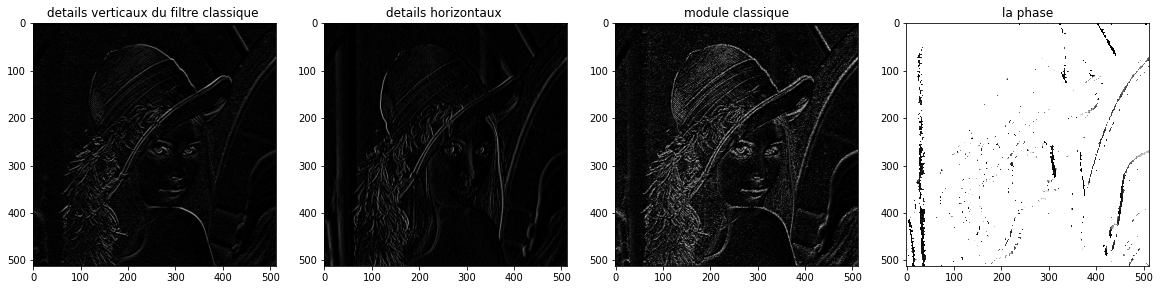

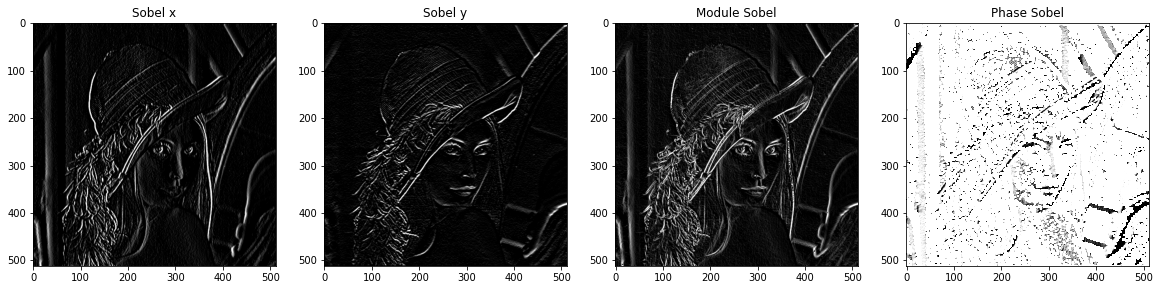

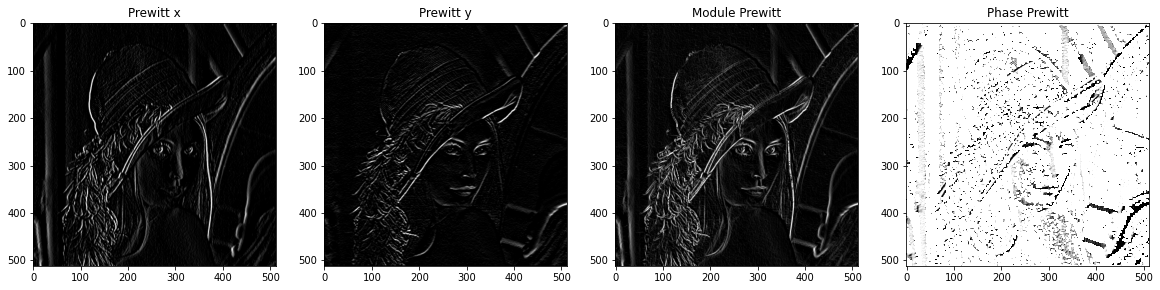

In [16]:
kerv=np.array([[-1],[1]])
kerh=np.array([[-1,1]])
lena_gris=np.uint8(lena_gris)
filtrever=cv.filter2D(lena_gris,-1,kerv)
filtrehor=cv.filter2D(lena_gris,-1,kerh)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(1,4,1)
plt.imshow(filtrever,cmap='gray')
plt.title("details verticaux du filtre classique ")
fig.add_subplot(1,4,2)
plt.imshow(filtrehor,cmap='gray')
plt.title("details horizontaux ")
module=np.sqrt(np.square(filtrehor.astype(np.float64)+np.square(filtrever)))
module_classique= np.uint8(module)
fig.add_subplot(1,4,3)
plt.imshow(module_classique,cmap='gray')
plt.title('module classique')
phase=np.arctan(filtrever/filtrehor)
fig.add_subplot(1,4,4)
plt.imshow(phase,cmap='gray')
plt.title("la phase")

#******Filtre Sobel**************************

kernelxs = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
kernelys = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

sobelx = cv.filter2D(lena_gris, -1, kernelxs)
sobely = cv.filter2D(lena_gris, -1, kernelys)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(3,4,1)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel x')


fig.add_subplot(3,4,2)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel y')


module_sobel_carre=np.square(sobelx.astype(np.float32))+np.square(sobely.astype(np.float32))

module_sobel=np.sqrt(module_sobel_carre)
module_sobel=np.uint8(module_sobel)

phase_sobel=np.arctan(sobely/sobelx)

fig.add_subplot(3,4,3)
plt.imshow(module_sobel,cmap = 'gray')
plt.title('Module Sobel')


fig.add_subplot(3,4,4)
plt.imshow(phase_sobel,cmap = 'gray')
plt.title('Phase Sobel')


#Filtre de Prewitt

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewittx = cv.filter2D(lena_gris, -1, kernelx)
prewitty = cv.filter2D(lena_gris, -1, kernely)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(3,4,1)
plt.imshow(prewitty,cmap = 'gray')
plt.title('Prewitt x')


fig.add_subplot(3,4,2)
plt.imshow(prewittx,cmap = 'gray')
plt.title('Prewitt y')


module_prewitt_carre=np.square(prewittx.astype(np.float32))+np.square(prewitty.astype(np.float32))

module_prewitt=np.sqrt(module_prewitt_carre)
module_prewitt=np.uint8(module_prewitt)

phase_prewitt=np.arctan(prewitty/prewittx)

fig.add_subplot(3,4,3)
plt.imshow(module_prewitt,cmap = 'gray')
plt.title('Module Prewitt')


fig.add_subplot(3,4,4)
plt.imshow(phase_prewitt,cmap = 'gray')
plt.title('Phase Prewitt')



****Comparaison et commentaire 
- On remarque que les 3 filtres épaississent les contours dans cet ordre classique> prewitt>sobel 
- Les filtres Prewitt et Sobel sont moins sensibles au bruit car le fait d'introduire un moyennage local sur le domaine couvert par le masque diminue leurs sensibilités. Le filtre de Sobel donne
une meilleure estimation que celui de Prewitt car la série [1 2 1] est approximativement une gaussienne. Cependant les deux filtresépaississent les contours et le filtre Sobel les épaissit
d’avantage.


4-Le placien de 4 et 8 connexité 

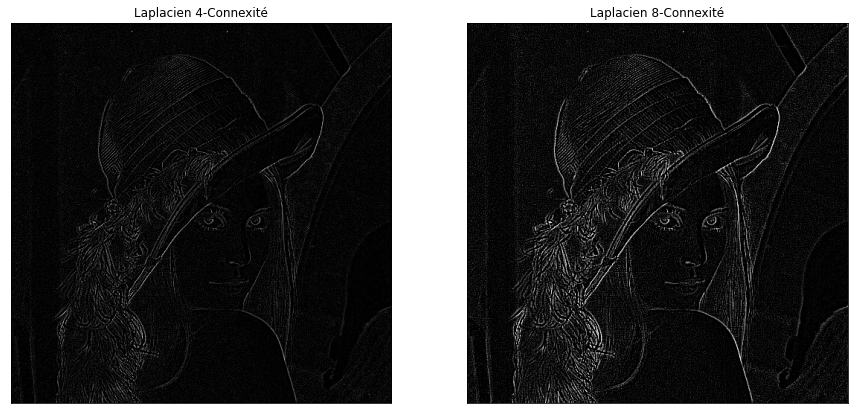

In [17]:
plt.figure(figsize=(15, 15))

kernel4 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacien4connex = cv.filter2D(lena_gris, -1, kernel4)

kernel8 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
laplacien8connex = cv.filter2D(lena_gris, -1, kernel8)

plt.subplot(1,2,1)
plt.imshow(laplacien4connex,cmap = 'gray')
plt.title('Laplacien 4-Connexité')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(laplacien8connex,cmap = 'gray')
plt.title('Laplacien 8-Connexité')
plt.xticks([])
plt.yticks([])

plt.show()

Comparaison : Le Laplacien 8-connexité détecte mieux les contours et il est moins sensible au bruit tandis que le Laplacien 4-connexité detecte les contours mais il est plus sensible au bruit.

5-application d'un filtrage gaussian avant de calculer le LAPLACIEN de 8 Connexitées 

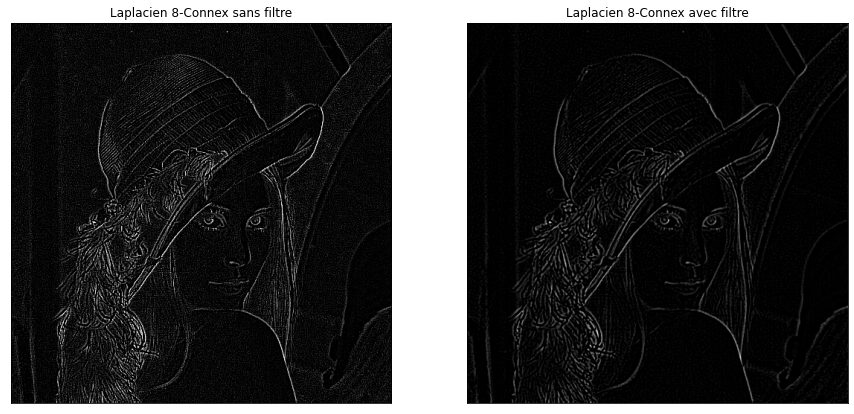

In [18]:
plt.figure(figsize=(15, 15))

gauss = cv.GaussianBlur(lena_gris,(3,3),1)

laplacien_gauss_8connex = cv.filter2D(gauss, -1, kernel8)

plt.subplot(1,2,1)
plt.imshow(laplacien8connex,cmap = 'gray')
plt.title('Laplacien 8-Connex sans filtre')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(laplacien_gauss_8connex,cmap = 'gray')
plt.title('Laplacien 8-Connex avec filtre')
plt.xticks([])
plt.yticks([])

plt.show()

l'application du filtre gaussien permet de reduire le bruit au debut donc les filtres seront moins sensible eu bruit ce qui induit a une meillieur detection du contour


**Conclusion** 

Les opérations de détection de contours ont pour but de transformer une image en une autre image de même dimension dans laquelle les contours apparaissent par convention en blanc sur un fond noir, en utilisant des filtres passe-haut pour l'accentuation des détails de l'image et l'élimination des régions homogènes. Il existe 2 approches de détection de contours :

*   Approche gradient : Filtres de Sobel, Prewitt et Robert.
*   Approche Laplacien : Laplacien 8-connexité et 4-connexité.

Le filtre de Sobel donne une meilleure estimation que celui de Prewitt car la série [1,2,1] est approximativement une gaussiènne, tandis que la série [1,1,1] approxime une moyenne. Cependant, les 2 filtres épaississent les contours mais celui de Sobel les épaissit davantage.

Les filtres de 1ère dérivée sont moins sensibles aux bruits car ils ont des filtres passe-bas en quelque sorte à l'intérieur (On avait déjà dit que les 2 séries [1,2,1] & [1,1,1] approximment respectivement une gaussiènne et une moyenne).

Le filtre Laplacien 8-connexité définit mieux les contours de l'image que le Laplacien 4-connexités mais rajoute beaucoup de bruit à l'image. Ceci est dû au fait que les filtres de 2ème dérivée sont très sensibles aux bruits. En essayant d'appliquer un filtre gaussien avant de calculer le Laplacien 8-connexité, on améliore le résultat (élimination de bruit), mais on obtient en ravanche les doubles contours. Afin de remédier à ce problème, on applique la méthode d'amélioration par seuillage, celle-ci donne un résultat très correct représentant fidèlement les contours de l'image mais causant en contre partie le problème de discontinuité (contours ouverts). La difficulté de la méthode réside dans le choix du seuil à utiliser mais la fonction "cv.THRESH_OTSU" peut nous aider à trouver le meilleur seuil automatiquement.